# Loading the requirement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import PoissonRegressor
from sklearn.tree import DecisionTreeRegressor


print("done")

done


In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Data Cleaning

In [4]:
# Normalization (dropping the useless columns)
df = df.drop(columns=['Email'])
df = df.drop(columns=['Avatar'])
df = df.drop(columns=['Address'])
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [33]:
# The value of avg session at one or two point is wrong(NaN) so we will replace it with the median

AvgSessionmedian = df['Avg. Session Length'].median()
print(AvgSessionmedian)

df['Avg. Session Length'] = df['Avg. Session Length'].fillna(AvgSessionmedian)
df

33.08852937


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [6]:
df.to_csv("Ecommerce Customers Modified.csv")

# Data Visualization

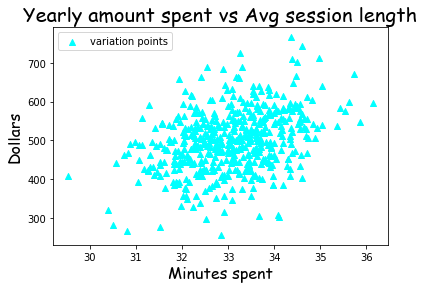

In [7]:
# title
plt.title("Yearly amount spent vs Avg session length",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Avg. Session Length'],df['Yearly Amount Spent'],marker='^',label='variation points',color='cyan')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes spent",fontdict={'fontname':'comic sans MS', 'fontsize':16})
plt.ylabel("Dollars",fontdict={'fontname':'comic sans MS', 'fontsize':16})
# saving the plot
# plt.savefig("YearlyamountspentvsAvgsessionlength.jpg",dpi=300)
# show the graph
plt.show()

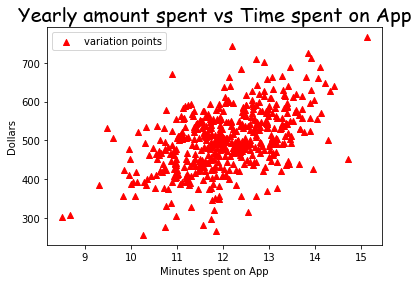

In [8]:
# title
plt.title("Yearly amount spent vs Time spent on App",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Time on App'],df['Yearly Amount Spent'],marker='^',label='variation points',color='red')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes spent on App")
plt.ylabel("Dollars")
# saving the graph
# plt.savefig('Yearly amount spent vs Time spent on App.jpg',dpi=300)
# show the graph
plt.show()

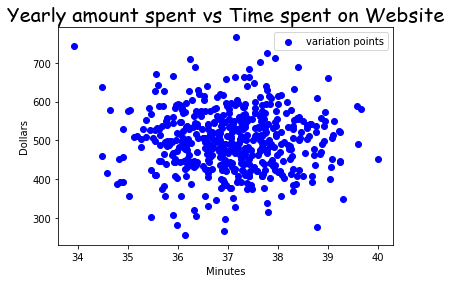

In [9]:
# title
plt.title("Yearly amount spent vs Time spent on Website",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'],marker='o',label='variation points',color='blue')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes")
plt.ylabel("Dollars")
# saving the figure
# plt.savefig('Yearly amount spent vs Time spent on Website.jpg',dpi=300)
# show the graph
plt.show()

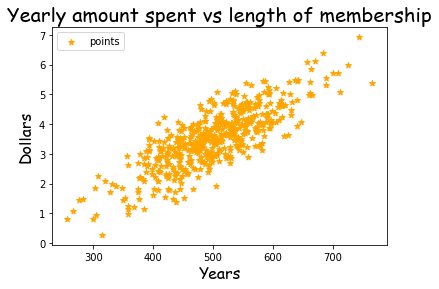

In [11]:
# title
plt.title("Yearly amount spent vs length of membership",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Yearly Amount Spent'],df['Length of Membership'],color='orange',marker='*',label='points')
# x and y labels
plt.xlabel("Years",fontdict={'fontname':'comic sans MS', 'fontsize':16})
plt.ylabel("Dollars",fontdict={'fontname':'comic sans MS', 'fontsize':16})
# show the legends
plt.legend()
# save the graph
# plt.savefig('Yearly amount spent vs length of membership.jpg',dpi=300)
# show the graph
plt.show()

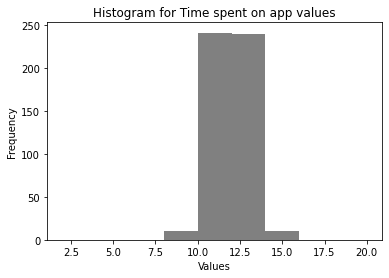

In [13]:
# histogram 

bins = [2,6,8,10,12,14,16,18,20]

plt.title("Histogram for Time spent on app values")

plt.hist(df['Time on App'],bins=bins,color='grey')

plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

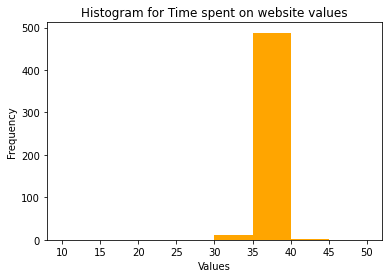

In [36]:
# histogram 

bins = [10,15,20,25,30,35,40,45,50]

plt.title("Histogram for Time spent on website values")

plt.hist(df['Time on Website'],bins=bins,color='orange')

plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

# Regression Model, Possion Regression Model and Decision Tree Regressor

In [14]:
x = df.drop(['Yearly Amount Spent'],axis=1).values 
# print(x)
y = df['Yearly Amount Spent'].values
# print(y)

In [15]:
# splitting the datset
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [16]:
# Naive Method
regression = linear_model.LinearRegression()
regression.fit(df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']].values,df['Yearly Amount Spent'].values)

# using possions regressors as well

pr = PoissonRegressor()

# using decision tree as well

dt = DecisionTreeRegressor()

In [35]:
# fitting the models

regression.fit(x_train, y_train)

pr.fit(x_train, y_train)

dt.fit(x_train, y_train)

print("Done")

Done


In [18]:
# regression model predictions 

pred = regression.predict(x_test)
print(pred)

[437.35084967 489.54254025 369.92050123 514.94374094 496.83478829
 451.2498724  457.10921729 335.96003664 527.7541065  664.19795597
 559.92305086 525.96128031 551.63542934 455.52086471 449.31678045
 430.93459341 562.87186121 408.52770729 599.07185633 486.66819923
 715.83669445 496.78607714 411.05125697 555.68639295 550.40352383
 398.66087209 419.71092012 395.68027341 547.99022599 463.64795192
 557.9797607  504.97765326 505.65229945 463.75027462 426.47018436
 400.03325211 503.11754065 429.74172161 570.39045612 421.12541101
 488.09962519 601.61079404 615.87962998 589.80531146 449.48165627
 379.69988023 557.60102656 461.77875524 502.32271141 400.83750988
 523.89235135 416.41975091 576.63369805 477.3212855  456.2440918
 398.46292423 564.98435069 303.93235879 562.09794103 477.21361004
 499.11120378 434.6100408  464.30088385 577.46392887 502.70412559
 355.60504089 507.55635443 415.92203314 635.51778832 454.81479255
 453.02150092 766.52470587 518.21263648 456.86895354 378.68793945
 376.074786

In [19]:
# possion model predictions 

predictPossion = pr.predict(x_test)

print(predictPossion)

[435.46086386 483.63120016 380.19389963 509.47142033 491.07055542
 448.53367679 452.7105331  355.46566574 521.7764866  687.66765681
 557.10751937 520.49491095 546.51758395 450.71912992 446.00264294
 429.41336391 559.59810533 410.98993808 600.96644023 480.91171816
 760.10048411 490.74086896 413.1003691  552.0771168  545.82181281
 403.75204807 419.68822865 400.81199314 543.6574229  459.77181237
 554.82636084 499.22791495 499.68638678 459.39785085 427.3318661
 403.87052187 496.12704775 428.51355209 568.77317968 421.71985635
 482.54794373 604.52405698 623.18598255 591.82492955 446.03624212
 388.38791148 553.05880059 456.54684625 496.79164411 404.9644696
 517.30885371 417.70901227 576.41618786 471.50460873 451.73210198
 404.40341797 563.5027381  333.04243119 558.84245413 472.26556038
 493.73890112 433.64853915 459.23716559 576.80398873 496.17349891
 369.46649348 500.44130267 417.11595807 648.00212296 451.39485539
 450.00209447 841.41472122 512.04278293 452.65230382 386.86476596
 385.2837481

In [20]:
# decision tree regression model predictions 

dtPred = dt.predict(x_test)

print(dtPred)

[444.582165  468.9135013 347.7769266 512.1658664 507.4418323 472.9922467
 424.1854943 350.0582002 502.4097853 627.6033187 542.7115581 529.2300901
 538.9419745 432.4720613 458.3769107 448.2298292 554.0030934 408.6201878
 548.5185293 496.6507081 662.9610878 521.8835732 387.5347163 571.3074949
 554.0030934 387.3570727 432.4720613 356.6155679 565.9943634 430.5888826
 571.2160048 505.1133435 529.1945189 459.2851235 479.7319376 413.3717831
 543.1326263 451.6286105 576.4776072 420.9161595 532.1274491 583.977802
 610.1280331 593.1564015 404.8245289 390.103273  529.0566632 436.5807403
 505.1133435 388.9405488 469.3831462 422.3687366 570.6300981 479.2310929
 444.9665517 479.7319376 545.9454921 357.8637186 583.0796357 507.3900618
 479.7319376 461.1122484 497.7786422 551.0230017 510.6617922 347.7769266
 424.1854943 458.3769107 640.7861664 440.0027475 451.4574469 689.2356998
 461.9208769 479.2310929 407.8763782 442.6672517 610.1280331 514.0098178
 479.6148117 427.1993849 494.5518611 519.3409891 557

### Sample predictions

In [21]:

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

regression.predict(ExtraDf.values)

array([593.79419875])

In [22]:
pr.predict(ExtraDf.values)

array([595.47802388])

In [23]:
dt.predict(ExtraDf.values)

array([587.951054])

### let's see accuracy of our model

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9848033950940315

In [25]:
r2_score(y_test,predictPossion)

0.9623285244877761

In [26]:
r2_score(y_test,dtPred)

0.8700255486740631

### plotting the results

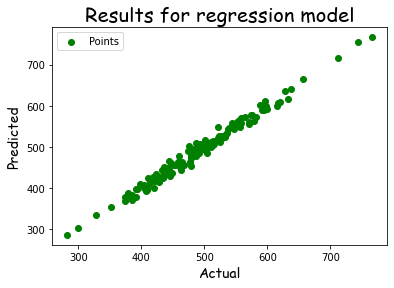

In [27]:
# figure size
# plt.figure(figsize={5,8})
# title 
plt.title("Results for regression model", fontdict={'fontname': 'comic sans MS', 'fontsize': 20})
# plot graph
plt.scatter(y_test,pred,color='green',label="Points",marker='o')
# x and y
plt.xlabel("Actual",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
plt.ylabel("Predicted",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
# legends
plt.legend(loc='upper left');
# saving the plot
plt.savefig("Results.png",dpi=300)
# show graph
plt.show()

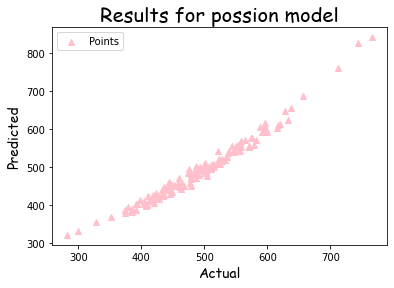

In [28]:
# figure size
# plt.figure(figsize={5,8})
# title 
plt.title("Results for possion model", fontdict={'fontname': 'comic sans MS', 'fontsize': 20})
# plot graph
plt.scatter(y_test,predictPossion,color='pink',label="Points",marker='^')
# x and y
plt.xlabel("Actual",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
plt.ylabel("Predicted",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
# legends
plt.legend(loc='upper left');
# saving the plot
plt.savefig("ResultsPossion.png",dpi=300)
# show graph
plt.show()

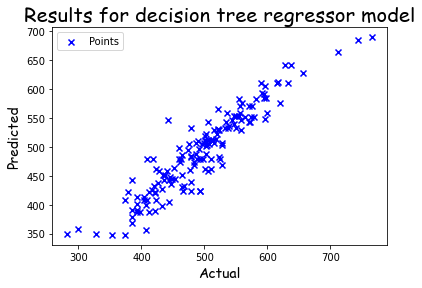

In [29]:
# figure size
# plt.figure(figsize={5,8})
# title 
plt.title("Results for decision tree regressor model", fontdict={'fontname': 'comic sans MS', 'fontsize': 20})
# plot graph
plt.scatter(y_test,dtPred,color='blue',label="Points",marker='x')
# x and y
plt.xlabel("Actual",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
plt.ylabel("Predicted",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
# legends
plt.legend(loc='upper left');
# saving the plot
plt.savefig("ResultsPossion.png",dpi=300)
# show graph
plt.show()

### line graph for linear regression, possion regression and decisionTree regression

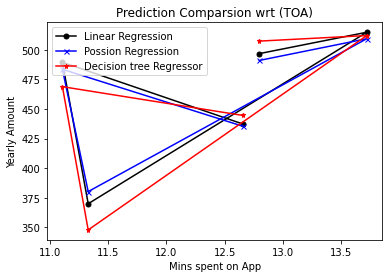

In [30]:
plt.title("Prediction Comparsion wrt (TOA)")

plt.plot(df['Time on App'][:5],pred[:5],label="Linear Regression",linestyle='-',marker='o',markersize=5,color='black')

plt.plot(df['Time on App'][:5],predictPossion[:5],label="Possion Regression",linestyle='-',marker='x',markersize=5,color='blue')

plt.plot(df['Time on App'][:5],dtPred[:5],label="Decision tree Regressor",linestyle='-',marker='*',markersize=5,color='red')

plt.ylabel("Yearly Amount")
plt.xlabel("Mins spent on App")

plt.legend(loc='upper left')

plt.show()

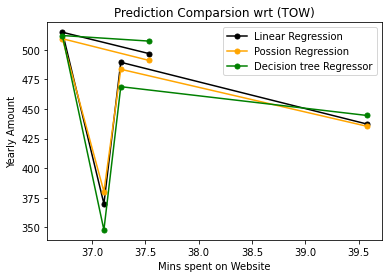

In [32]:
plt.title("Prediction Comparsion wrt (TOW)")

plt.plot(df['Time on Website'][:5],pred[:5],label="Linear Regression",linestyle='-',marker='o',markersize=5,color='black')

plt.plot(df['Time on Website'][:5],predictPossion[:5],label="Possion Regression",linestyle='-',marker='o',markersize=5,color='orange')

plt.plot(df['Time on Website'][:5],dtPred[:5],label="Decision tree Regressor",linestyle='-',marker='o',markersize=5,color='green')

plt.ylabel("Yearly Amount")
plt.xlabel("Mins spent on Website")

plt.legend()

plt.show()

### creating a results csv


In [101]:
results = pd.DataFrame({'Actual Values': y_test,'Predicted Values (regression)':pred,'Predicted Values (Possion)':predictPossion,'Predict Values (Decision tree)': dtPred,'Difference (regession)': y_test-pred,'Difference (possion)':y_test - predictPossion,'Difference (decision tree)':y_test - dtPred})
results.head(10)
results.to_csv('Results.csv') 

# Mathematical proof for regression model

In [102]:
m = regression.coef_
c = regression.intercept_

print('m :',m)
print('c :',c)

m1 = m[0]
m2 = m[1]
m3 = m[2]
m4 = m[3]

y = m1*(34.5) + m2*(12.66) + m3*(39.58)+ m4*(4.08) + c
print(y)


m : [ 2.57126547e+01  3.85810335e+01 -1.18000907e-02  6.22351203e+01]
c : -1035.1805144538644
593.7941987546656


# Where should the company put their attention Website or App?

In [36]:
# we will keep everything constant and will be changing only time on app value

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val1 = regression.predict(ExtraDf.values)[0]
print(val1)

# second phase

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[14.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val2 = regression.predict(ExtraDf.values)[0]
print(val2)

# third 

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[16.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val3 = regression.predict(ExtraDf.values)[0]
print(val3)

listIncInyearlyAmtSpent1 = [val1,val2,val3]
print(listIncInyearlyAmtSpent1)

593.7941987546656
670.9562658162529
748.1183328778404
[593.7941987546656, 670.9562658162529, 748.1183328778404]


In [39]:
# we will keep everything constant and we be changing only time on website

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val1 = regression.predict(ExtraDf.values)[0]
print(val1)

# second phase

ExtraDf = pd.DataFrame({'Avg. Session Length':[36.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val2 = regression.predict(ExtraDf.values)[0]
print(val2)

# third 

ExtraDf = pd.DataFrame({'Avg. Session Length':[38.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val3 = regression.predict(ExtraDf.values)[0]
print(val3)

listIncInyearlyAmtSpent2 = [val1,val2,val3]
print(listIncInyearlyAmtSpent2)

593.7941987546656
645.2195080632039
696.6448173717422
[593.7941987546656, 645.2195080632039, 696.6448173717422]


In [40]:
newList = []

newList = np.array(listIncInyearlyAmtSpent1) - np.array(listIncInyearlyAmtSpent2)

newList

array([ 0.        , 25.73675775, 51.47351551])

# As we can see the difference between the values the company should clearly focus on app 